# Tabular data

In this Jupyter notebook the data from the simulations, which were used to generate charts in the project are sumarised into ordered readable tables, which are grouped by the respective experiment. These tables were ommited from the bachelor project main text in order to make the text it self shorterand in consequence save paper.

Note that this notebook expects GNU/Linux operating system.

## Initialise

In [1]:
# Import NumPy
import numpy as np
# Import scipy optimization
import scipy as sp
# Import mathplotlib
import matplotlib.pyplot as plt
# Import pandas
import pandas as pd
# Import networkx
import networkx as nx
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
def pd_process(data_df):
    res_proc = pd.DataFrame({'Mean': data_df.mean(axis = 1),\
                           'Std': data_df.std(axis = 1),\
                           'Sem': data_df.sem(axis = 1)})
    return res_proc

List used CSV files

In [3]:
!ls *.csv

COB_QAOA_nfev_df.csv	 COBYLA_results_df.csv	RMSProp_QAOA_nfev_df.csv
COB_QAOA_results_df.csv  QGD_nfev_df.csv	RMSProp_QAOA_results_df.csv
COB_QAOA_val_df.csv	 QGD_results_df.csv	RMSProp_QAOA_val_df.csv
COBYLA_nfev_df.csv	 RMSProp_nfev_df.csv	RMSProp_results_df.csv


## Basic QAOA

For the basic QAOA the only parameters, which were logged are number of loops for the tested optimizers.
The table containing the number of loops needed for convergence is listed in the main text of project.

In [19]:
PERF = X = np.loadtxt('01PERF.txt')
df = pd.DataFrame(PERF, columns = ['0.01', '0.02', '0.03', '0.04', '0.05'])

In [21]:
df.insert(0, "Method", ['Simple GD', 'Scheduled GD', 'COBYLA', 'RMSProp'], True)
df

Method   0.01   0.02   0.03   0.04   0.05
0     Simple GD  27.05  19.55  17.05  12.20  10.00
1  Scheduled GD  16.95  12.60   8.50   7.85   7.60
2        COBYLA  18.30  17.05  14.55  14.20  13.95
3       RMSProp  17.80  11.20  10.75   9.70   6.15

## Basic VQE

The data are grouped by the used optimizer algorithm. For each algorithm the result, representing the eigenvalue approximation, and the number of algorithm loops were logged.

The data are presented in order "number of loops, results".

In [29]:
shots = range(200, 1040, 80)
print(list(shots))

[200, 280, 360, 440, 520, 600, 680, 760, 840, 920, 1000]


### RMSProp

In [32]:
EX1 = !ls RMSProp*df.csv

In [34]:
for FILE in EX1:
    tmp_df = pd.read_csv(FILE)
    tmp_df = pd_process(tmp_df)
    tmp_df.insert(0, "Shots", shots, True)
    tmp_df

Shots  Mean        Std        Sem
0     200  49.4  36.056129  11.401949
1     280  63.6  36.068453  11.405846
2     360  59.7  31.563164   9.981149
3     440  64.0  40.232657  12.722683
4     520  71.9  35.233980  11.141963
5     600  52.9  36.837330  11.648987
6     680  85.5  29.224229   9.241513
7     760  59.9  43.585038  13.782799
8     840  66.0  33.466401  10.583005
9     920  71.6  29.646810   9.375144
10   1000  68.4  36.758068  11.623922

Shots      Mean       Std       Sem
0     200 -0.565675  0.083524  0.026413
1     280 -0.562525  0.083127  0.026287
2     360 -0.585000  0.079280  0.025071
3     440 -0.587175  0.054090  0.017105
4     520 -0.584825  0.089204  0.028209
5     600 -0.591900  0.087666  0.027723
6     680 -0.565300  0.071414  0.022583
7     760 -0.555925  0.103443  0.032712
8     840 -0.564425  0.084367  0.026679
9     920 -0.580425  0.056523  0.017874
10   1000 -0.536900  0.079475  0.025132

### COBYLA

In [35]:
EX2 = !ls COBYLA*df.csv

In [37]:
for FILE in EX2:
    tmp_df = pd.read_csv(FILE)
    tmp_df = pd_process(tmp_df)
    tmp_df.insert(0, "Shots", shots, True)
    tmp_df

Shots  Mean       Std       Sem
0     200  47.2  2.250926  0.711805
1     280  50.5  6.222718  1.967796
2     360  47.3  4.448470  1.406730
3     440  50.5  8.618456  2.725395
4     520  50.0  3.829708  1.211060
5     600  50.4  3.306559  1.045626
6     680  51.1  4.094712  1.294862
7     760  51.0  3.431877  1.085255
8     840  50.5  4.994441  1.579381
9     920  47.0  3.299832  1.043498
10   1000  47.5  4.813176  1.522060

Shots      Mean       Std       Sem
0     200 -0.664125  0.045663  0.014440
1     280 -0.658214  0.050709  0.016035
2     360 -0.678958  0.040581  0.012833
3     440 -0.681420  0.043888  0.013879
4     520 -0.677933  0.052985  0.016755
5     600 -0.703708  0.024415  0.007721
6     680 -0.712059  0.021360  0.006755
7     760 -0.690099  0.028803  0.009108
8     840 -0.713482  0.020351  0.006436
9     920 -0.714375  0.013844  0.004378
10   1000 -0.707650  0.017570  0.005556

### Qiskit GradientDescent

In [38]:
EX3 = !ls QGD*df.csv

In [39]:
for FILE in EX3:
    tmp_df = pd.read_csv(FILE)
    tmp_df = pd_process(tmp_df)
    tmp_df.insert(0, "Shots", shots, True)
    tmp_df

Shots   Mean  Std  Sem
0     200  100.0  0.0  0.0
1     280  100.0  0.0  0.0
2     360  100.0  0.0  0.0
3     440  100.0  0.0  0.0
4     520  100.0  0.0  0.0
5     600  100.0  0.0  0.0
6     680  100.0  0.0  0.0
7     760  100.0  0.0  0.0
8     840  100.0  0.0  0.0
9     920  100.0  0.0  0.0
10   1000  100.0  0.0  0.0

Shots      Mean       Std       Sem
0     200 -0.449625  0.222261  0.070285
1     280 -0.458571  0.325951  0.103075
2     360 -0.490486  0.273479  0.086482
3     440 -0.577614  0.121565  0.038442
4     520 -0.643702  0.078216  0.024734
5     600 -0.616958  0.068497  0.021661
6     680 -0.602353  0.138758  0.043879
7     760 -0.611480  0.149506  0.047278
8     840 -0.669315  0.062012  0.019610
9     920 -0.624484  0.129517  0.040957
10   1000 -0.666550  0.050910  0.016099

## Practical QAOA

The data are grouped by the used optimizer algorithm. For each algorithm the result, expectation value, the number of algorithm loops and the number of correct solutions generated were logged.

The data are presented in order "number of loops, results, correct solution probability".

### COBYLA

In [42]:
EX4 = !ls 03COB_QAOA*df.csv

In [46]:
for FILE in EX4:
    tmp_df = pd.read_csv(FILE)
    tmp_df = pd_process(tmp_df)
    tmp_df.insert(0, "Shots", shots, True)
    tmp_df

Shots   Mean       Std       Sem
0    1000  112.8  3.293090  1.041367
1    1500  113.4  2.674987  0.845905
2    2000  114.0  2.403701  0.760117
3    2500  114.7  2.002776  0.633333
4    3000  114.3  2.002776  0.633333
5    3500  116.1  3.107339  0.982627
6    4000  115.7  4.667857  1.476106
7    4500  115.9  3.510302  1.110055
8    5000  115.8  3.392803  1.072898
9    5500  114.2  2.859681  0.904311
10   6000  115.0  4.666667  1.475730
11   6500  115.3  2.869379  0.907377
12   7000  115.6  4.575296  1.446836
13   7500  115.5  2.677063  0.846562
14   8000  116.9  2.601282  0.822598
15   8500  117.6  4.765618  1.507021
16   9000  117.4  3.949684  1.249000
17   9500  119.3  5.375872  1.700000

Shots    Mean       Std       Sem
0    1000  0.0130  0.019293  0.006101
1    1500  0.0022  0.002486  0.000786
2    2000  0.0070  0.006782  0.002145
3    2500  0.0082  0.008337  0.002636
4    3000  0.0019  0.001853  0.000586
5    3500  0.0081  0.008171  0.002584
6    4000  0.0015  0.002415  0.000764
7    4500  0.0031  0.002846  0.000900
8    5000  0.0046  0.005661  0.001790
9    5500  0.0079  0.008888  0.002810
10   6000  0.0050  0.008028  0.002539
11   6500  0.0029  0.004886  0.001545
12   7000  0.0115  0.013616  0.004306
13   7500  0.0066  0.006222  0.001968
14   8000  0.0098  0.008297  0.002624
15   8500  0.0038  0.006052  0.001914
16   9000  0.0043  0.008260  0.002612
17   9500  0.0088  0.009964  0.003151

Shots       Mean       Std       Sem
0    1000 -31.733392  1.200632  0.379673
1    1500 -32.349378  0.761890  0.240931
2    2000 -31.277800  0.721900  0.228285
3    2500 -31.331542  0.778765  0.246267
4    3000 -32.760484  0.790834  0.250084
5    3500 -32.622036  0.731826  0.231424
6    4000 -32.822109  0.342993  0.108464
7    4500 -32.477434  0.908380  0.287255
8    5000 -32.113529  1.036934  0.327907
9    5500 -31.903242  1.013791  0.320589
10   6000 -32.497278  0.758070  0.239723
11   6500 -32.623704  0.827133  0.261562
12   7000 -32.340459  0.850315  0.268893
13   7500 -31.944461  1.066443  0.337239
14   8000 -32.213722  0.992091  0.313727
15   8500 -32.952851  0.281867  0.089134
16   9000 -32.200913  1.039073  0.328584
17   9500 -32.355814  0.774025  0.244768

### RMSProp

In [47]:
EX5 = !ls 03RMSProp_QAOA*df.csv
shots = range(1000, 10000, 500)

In [48]:
for FILE in EX5:
    tmp_df = pd.read_csv(FILE)
    tmp_df = pd_process(tmp_df)
    tmp_df.insert(0, "Shots", shots, True)
    tmp_df

Shots   Mean         Std        Sem
0    1000  257.9   85.346939  26.989072
1    1500  271.3   60.747291  19.209980
2    2000  273.0   85.381497  27.000000
3    2500  219.5  106.153191  33.568587
4    3000  242.1   99.201758  31.370350
5    3500  237.7  101.329002  32.043044
6    4000  188.9  119.723246  37.859815
7    4500  268.4   57.473085  18.174585
8    5000  217.2  117.094264  37.028458
9    5500  229.0  103.714351  32.797358
10   6000  259.0   75.808238  23.972670
11   6500  267.3   59.606208  18.849138
12   7000  290.2   21.001587   6.641285
13   7500  200.9  128.178218  40.533512
14   8000  238.0   86.529378  27.362992
15   8500  255.2   60.570987  19.154228
16   9000  231.3  113.247075  35.811870
17   9500  248.6  100.670199  31.834712

Shots    Mean       Std       Sem
0    1000  0.1053  0.019477  0.006159
1    1500  0.0982  0.010973  0.003470
2    2000  0.0973  0.021391  0.006764
3    2500  0.1044  0.021813  0.006898
4    3000  0.0942  0.020395  0.006449
5    3500  0.1046  0.016036  0.005071
6    4000  0.1043  0.013284  0.004201
7    4500  0.1023  0.013098  0.004142
8    5000  0.0916  0.033735  0.010668
9    5500  0.0994  0.018590  0.005879
10   6000  0.1120  0.021899  0.006925
11   6500  0.1067  0.014174  0.004482
12   7000  0.0967  0.025565  0.008084
13   7500  0.0983  0.021140  0.006685
14   8000  0.0968  0.015669  0.004955
15   8500  0.1069  0.020685  0.006541
16   9000  0.0960  0.019743  0.006243
17   9500  0.0945  0.007122  0.002252

Shots       Mean       Std       Sem
0    1000 -33.892340  0.791759  0.250376
1    1500 -34.065526  0.206972  0.065450
2    2000 -33.675666  0.644254  0.203731
3    2500 -34.099727  0.317628  0.100443
4    3000 -33.867754  0.560398  0.177213
5    3500 -34.035959  0.364283  0.115196
6    4000 -34.072108  0.212382  0.067161
7    4500 -34.065891  0.252785  0.079938
8    5000 -33.551391  1.367157  0.432333
9    5500 -33.973255  0.292664  0.092548
10   6000 -33.895978  0.666269  0.210693
11   6500 -34.072360  0.292892  0.092621
12   7000 -33.528497  1.016779  0.321534
13   7500 -33.798894  0.763127  0.241322
14   8000 -33.882203  0.345207  0.109164
15   8500 -33.760151  0.563163  0.178088
16   9000 -33.749688  0.463751  0.146651
17   9500 -33.946535  0.274338  0.086753

## Additional data
In order to present some of the data that were collected during the simulation, the jupyter notebooks are suited better than paper. Example of such data is the model of parameter landscape for the QAOA. The results are presented  in for =m of an interactive matplotlib scatter plot.

In [49]:
X_coor = np.loadtxt('03QAOA_plain_x.txt')
Y_coor = np.loadtxt('03QAOA_plain_y.txt')
Z_coor = np.loadtxt('03QAOA_plain_z.txt')
X_pos = np.loadtxt('03QAOA_pos_x.txt')
Y_pos = np.loadtxt('03QAOA_pos_y.txt')
Z_pos = np.loadtxt('03QAOA_pos_z.txt')

In [50]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


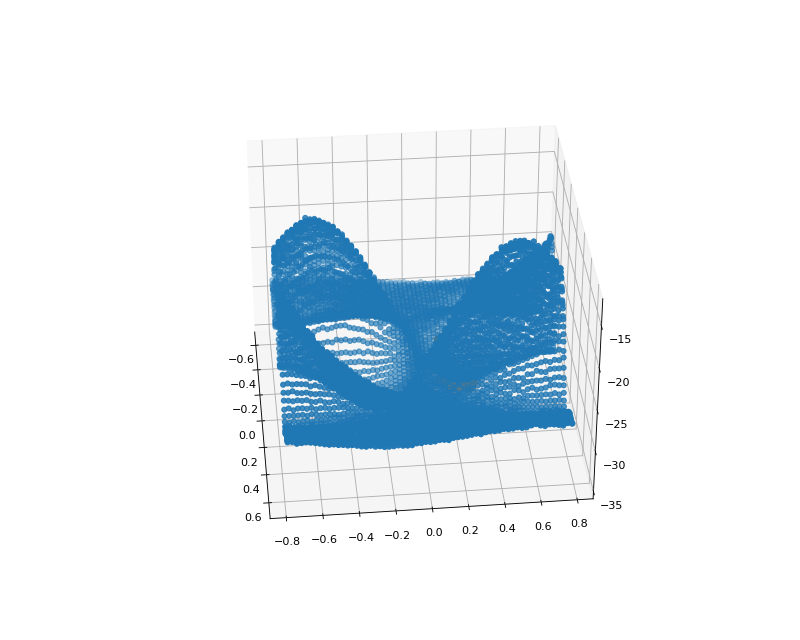

In [51]:
xs = X_coor

ys = Y_coor

zs = Z_coor

fig = plt.figure(figsize=(10, 8), dpi=80)

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs,ys,zs)
ax.scatter(X_pos, Y_pos,Z_pos)
plt.show()